#### To Do
* Add bond pricing function to Valuation Measures section.
* Add yield curve estimation method equations and accompanying code to Yield Curve Estimation section.
    * i.e Nelson-Siegel, Svensson, et cetera.
* Add duration formula, derivation, and plot to Duration section.
    * Macauley Duration equation, Modified Duration equation.
    * Duration as a first order Taylor Series approximation.
* Add notes on Trinomial Tree pricing methods.

* Notes on symmetry of returns:
    * What gain reverses a 40% loss?
    * Why does log-log fix this?
    * Plot of gains compared to losses in % terms.

* Papers:
    * Merton (1971) Portfolio Choice
    * Black Scholes (1973) Option Pricing

---

## Sections
* Valuation Measures
* Sensitivity Measures
* Modeling Methods
* Yield Curves
* Fixed Income Security Types
* Bond Measure Definitions
* General Definitions
* Assorted
* Papers

---

## Valuation Measures

#### Present Value
* Present Value of a single cash flow equation:
    * Where $CF$ is the cash flow, $r$ is the discount rate, and $t$ is the number of time periods until the cash flow arrives.
$$PV = \frac{CF}{(1+r)^t}$$

In [4]:
import numpy as np

# Present value function.
def pv(cf, r, t):
    return cf * np.exp(-r * t)

# Present value of $1000 discounted for 5 years at 5%.
out = pv(1000, 0.05, 5)
print("Present value of $1000 discounted for 5 years at 5%: ", out)


Present value of $1000 discounted for 5 years at 5%:  778.8007830714049


#### Discounted Cash Flow

* Estimates present-value using expected future cash flows.
    * Where $n$ is the number of periods, $CF$ is the cash flow, and $r$ is the discount rate.
$$DCF = \frac{CF_1}{(1 + r)^1} + \frac{CF_2}{(1 + r)^2} + ... + \frac{CF_n}{(1 + r)^n}$$

#### Bond Valuation

* **Bond Valuation Formula**:
    * Where $C$ is the coupon payment, $F$ is the face value, $r$ is the discount rate, and $n$ is the number of periods (time to maturity).
    
    $$Bond\ Value = \frac{C}{(1 + r)^1} + \frac{C}{(1 + r)^2} + ... + \frac{C + F}{(1 + r)^n}$$

* **Zero-coupon Bond Valuation**:

$$Bond\ Value = \frac{F}{(1 + r)^n}$$

* **Full Repricing Formula**:
* $C$ is the coupon payment, $F$ is the face value, $n$ is the number of coupon payments, $f$ is the time between coupon payments (years), $k$ is the time until next coupon payment (years), and $r$ is the spot Treasury rate.
* This particular implementation is conditional on a projection of the spot Treasury rate $r$ at all future time periods $t$.

$$Bond\ Value = C \sum_{i=1}^{n} e^{-r_t * t} + Fe^{-r_T * T}$$

$$t = (i-1) * f + k$$
$$T = (n-1) * f + k$$


* $T$ is the time (years) to maturity.
* $t$ is the time (years) until the next coupon payment.
* The first term $C$ calculates the present value of all coupon payments $n$.
* The second term $F$ calculates the present value of the face value $F$ at maturity $T$.
* The term $e^{-r_t * t}$ is equivalent to $\frac{1}{(1 + r_t)^t}$ using the approximation $(1-x) = e^{-x}$.

In [ ]:
# Bond pricing function.
# Add here!

#### Yield-to-Maturity
* The percentage rate of return paid if a bond is held from present to its maturity date.
* Measured as an annual rate, considers the rate of return if an investor holds a bond to maturity with all payments made as scheduled and reinvested at the same rate with no consideration given to prepayment.
* Where $C$ is the coupon payment, $F$ is the face value, $r$ is the discount rate, and $n$ is the number of periods (years it takes the bond to reach maturity).
$$YTM = \frac{C + \frac{FV - PV}{n}}{\frac{FV + PV}{2}}$$
* This is dervied by rearranging the bond valuation formula to solve for $r$.

---

## Sensitivity Measures

**Duration (Modified Duration)** = Measure of the sensitivity of a bond to changes in interest rates.
* Measured in years, the higher the duration of the bond the longer you need to wait for repayment.
* Duration is a function of cash flows and interest rates, but this calculation becomes complicated if there are embedded options.
* As a general rule, for every 1% increase or decrease in interest rates a bond's price will change approximately 1% in the opposite direction for every year of duration.

**Macauley Duration** = The weighted average time to maturity of a bonds cash flows without considering embedded options. 
* The weight of each cash flow is determined by dividing the present value of the cash flow by the price.
* Interpreted as the weighted average number of years that an investor must maintain a position in the bond until the present value of the bond's cash flows equal the amount paid for the bond.
* Macauley Duration is a function of price, maturity, coupon, and yield to maturity.
* A coupon paying bond will always have a duration less than its time to maturity.

**Effective Duration**
* The percentage change in the price of a bond given a parallel shift in the semi-annual par coupon government yield curve while keeping the OAS constant. 

**Spread Duration**
* The sensitivity of a bond to a 100bps increase or decrease in its OAS.

**Convexity**
* Measure of the degree of curve in the relationship between bond prices and bond yields.
* The second derivative of a security's price with respect to its yield divided by the security's price where it is assumed that the bond will be redeemed at its final maturity date w/o regard to embedded options. 
    * Reflects the rate at which the duration of a bond changes as interest rates change.
* If a bond's duration increases as yields increase it has negative convexity, if a bond's duration increases when yields decrease the bond has positive convexity.
* Under normal market conditions, the higher the coupon rate (yield) the higher the bond's convexity.

---

## Modeling Methods

#### Duration Approach

#### PD - LGD - EAD Approach
* Used to model expected credit losses.
* **Probability of Default (PD)** = The likelihood that a borrower will default on their debt obligations.
* **Loss Given Default (LGD)** = The amount of money a lender loses when a borrower defaults on a loan.
* **Exposure at Default (EAD)** = The total value that a bank is exposed to when a borrower defaults on a loan.


---

## Yield Curves

#### Yield Curve Definitions

**Par Yield Curve** = The yield curve that gives to yield-to-maturity (YTM) for coupon paying bonds at each maturity.
* Interpolates the yield curve for Treasury securities based on all maturities being priced at par value.
* When YTM equals the bond's coupon rate the bond sells at par. Thus the par curve gives the coupon rate that a bond with a given maturity must pay to sell at par today.
* The par curve is the starting point for developing the spot curve and the forward curve.

**Spot Yield Curve** = The yield curve used to discount a single cash flow (a spot payment) at a given maturity back to the present.
* The spot yield curve is what is used to discount cash flows.
* The spot curve is a zero-coupon curve that does not assume re-investment.
* Since duration is longer on the spot curve (because there are no coupons), the curve will be above the par curve when the yield cruve is upward sloping and below the par cruve when yields are downward sloping.
* To determine the price of a coupon-paying bond, instead of discounting all of the cash flows at the same rate (the bond's YTM), you can discount the first coupon at the spot rate for its maturity, the second at the spot rate for its maturity, et cetera.
* The spot curve may be built by looking at the yields of zero-coupon Treasury bonds.

**Forward Yield Curve** = The yield curve used to discount a single cash flow at a given maturity back one period (generally 6 months).
* Similar to the spot curve in that it discounts a single payment, but the single payment is only discounted back one period.
* The one-year forward rate is the rate used to discount a single payment one year from today back to 6 months from today.
* The eight-year forward rate is the rate used to discount a single payment eight years from today back to 7.5 years from today.

#### Yield Curve Estimation
* Nelson-Siegel
* Svensson
* Additional yield curve estimation methods.

---

## Fixed Income Security Types

#### General Fixed Income Security Types

**Zero-Coupon Bond** = Bonds that do not pay periodic interest. They pay the par value at maturity and the interest results from the fact that zero-coupon bonds are initially sold at a price below par value.

**Deferred-Coupon Bonds** = Bonds that carry coupons, but the initial coupon payment is deferred for a specified period. After that period, the accrued coupon payments are paid as a lump sum and the bond continues to pay regular coupon interest afterwards.

**Floating-Rate Securities** = Bonds for which the interest payment varies based on a specified rate or index. The most common procedure for setting the coupon rate is a reference rate (i.e. LIBOR) + a stated margin rate. The margin rate may also vary over time according to a schedule that is stated at indenture.
* Parties to a bond can also limit exposure to extreme fluctuations in the reference rate by putting a cap or a floor on the coupon payment.

**Amortizing Securities** = Bonds that make periodic interest *and* principal payments over the life of the bond. A conventional mortgage is an example of an amortizing loan.

**Non-Amortizing Securities** = Bonds that pay only interest until maturity, at which point the principal is repaid. This repayment structure is referred to as a *bullet bond* or *bullet maturity*.

**Accrual Loan** = Loan where the borrower does not make periodic interest payments, instead interest is added to the principal balance of the loan and the borrower is responsible for repayment at the end of the loan term or upon maturity.

#### Specific Security Types

**Leveraged Loans** = Loan extended to companies/individuals with below investment-grade credit or a high level of debt relative to earnings. Typically provided by banks and often used to finance leverage buyouts or M&A.
* Leveraged loans are typically senior secured debt meaning they are backed by collateral such as the borrower's assets, property, or revenue streams.

**Covered Bonds** = Security issued by banks that is backed by a pool of high-quality assets, usually mortgage loans or public sector loans. Covered bond holders have dual recourse in that they have a claim on both the underlying assets and the general assets of the issuer (the bank).
* Similar to asset-backed-securities, but the underlying assets (cover pool) remains on the balance sheet of the corporation that issues the assets, no intermediary special purpose enterprise (SPE) is created.

**Convertible Bonds** = Give bondholders the option to exchange the bond for a specific number of shares in the issuing corporation's common stock.
* Typically issued with 5 to 10 year maturities.
* Gives bondholders the opportunity to benefit from increases in the value of common shares.
* The owner of the convertible has the downside protection (compared to just owning equity shares) of a bond and the upside opportunity of equity shares.
* Issuers have the advantage of being able to issue at lower yields than normal bonds (due to optionality premium) and the advantage the debt financing is converted to equity financing.
* Convertible bonds are considered as a *hybrid security*, part debt and part equity.

**TRS: Total Return Swap** = Financial contract in which two parties (*total return receiver* and *total return payer*) exchange the total returns of an underlying asset of portfolio.
* The *total return receiver* wants exposure to the underlying asset without owning it, the *total return payer* seeks to generate income or hedge their exposure to the asset.
* The *total return receiver* pays a fixed or floating rate to the *total return payer*, an example swap could be the LIBOR + 2% fixed margin for the return on the S&P 500. Assuming the LIBOR is 3.5%, if the S&P500 appreciates by 15% than the *total return receiver* makes 15 - 5.5%, if the S&P500 depreciates by 15% the *total return payer* makes 15 + 5.5%.
* Popular among hedge funds as it allows for leveraging and large exposure to an asset with minimal cash outlay.

**ARS: Auction Rate Security** = Variable-rate security where the interest rate is reset every ~ month through a Dutch auction.
* Generally bonds with 20-30 year maturities issued by municipalities or corporations.
* The Dutch auction ensures that the bond is sold at the interest rate that will clear the market at the lowest possible yield.

**Commercial Paper** = Short-term, unsecured debt instrument issued by creditworthy corporations to fund day-to-day activities.
    * In the US commercial paper commercial paper must be issued with a maturity of 270 days or less.

**Credit Linked Note (CLN)** = 
* Instrument with regular coupon payments, but its redemption value depends on whether a specific credit event occurs. 
* If the credit event (such as a rating downgrade or the default of a reference asset) does not occur the CLN is redeemed at par value. 
* If the credit event does occur, the CLN makes a lower redemption payment and the holder gets less back.
* Purchasing a CLN can be viewed as buying a note and simultaneously selling a credit default swap (where the seller pays out if default occurs), the yield on the CLN is higher than the yield on the note alone, compensating the buyer for taking on the credit risk of the reference asset.

#### ABS/MBS Security Types

**Agency MBS** = Pool of individual mortgage loans that are issued as bonds or securities that represent claims on the cash flows generated by the mortgage loans. The term "Agency" comes from the fact that the individual mortgages are issued by government sponsored enterprises (GSEs) such as Fannie Mae or Freddie Mac.
* Mortgage loans are originated by banks or mortgage companies.
* These loans are sold to GSEs.
* The GSEs pool the mortgages together based on characteristics (loan type, interest rate, geography), and then divide them into different tranches with different risk and return profiles.
* Investors can then purchase the MBS to have fractional ownership of the underlying mortgage loans.

**CMBS: Commercial Mortgage Backed Security** = MBS backed by a pool of commercial real estate (CRE) loans instead of residential loans.

**RMBS: Residential Mortgage Backed Security** = MBS backed by a pool of residential mortgages.

**CMO: Collateralized Mortgage Obligation** = Type of MBS with multiple tranches organized by risk profile, tranches have different principal balances, interest rates, and prepayment potential. Contains only mortgages.

**CDO: Collateralized Debt Obligation** = Similar to CMOs with loans pooled and divided into tranches, but CDOs contain a range of debt products including car loans, credit cards, commerical debt, and mortgages. 

**CLO: Collateralized Loan Obligation** = Similar to CMOs and CDOs, but are backed by a pool of loans that often include corporate loans made to companies with low credit ratings or leveraged loans made to PE firms conducted leveraged buyouts.

---

## Bond Measure Definitions

**Term to Maturity / Tenor** = Time remaining until bond maturity.

**Par Value** = Principal amount that will be repaid at maturity.
* A bond trading above its par value is trading at a *premium*, a bond trading below its par value is trading at a *discount*.

**Accrued Interest** = Amount of bond interest that has been accumulated since the last time a bond interest payment was made, often stated as a % of face value.

**Asset Swap** = Swap of a bond's fixed coupon for a floating rate coupon pegged to a short term reference deposit rate. 

**Cash** = For a bond, cash is the amount received during the month from coupon payments plus interest on coupon payments received at the applicable reinvestment rate, often stated as a % of face value.

**Effective Yield** = The yield of a hypothetical bullet bond created by stripping out any embedded optionality such as call or put options.

**Total Return** = The combination of return from interest and any capital gains/losses from the purchase or sale of bonds in a portfolio.

**Excess Return** = The total return of a bond minus the total return percentage of a risk-matched basket of government bonds. The government basket is typically comprised of synthetic governmen securities derived from the fair value government yield curve. 

**Option-Adjusted Spread (OAS)** = Number of basis points that the fair value government spot curve is shifted in order to match the present value of discounted cash flows to the bond's price. This is a measurement of the spread of a bond to the risk-free rate of return.

**Duration to Maturity** = The percentage change in the price of a bond for a 100 basis point change in yield where it is assumed that the bond will be redeemed at its final maturity without regard to any embedded options.

**Spread Duration** = The percentage change in the price of a bond for a 100 basis point change in OAS.

**Yield to Maturity** = The percentage rate of return paid if a bond is held to its maturity date. 
* Measured as an annual rate, considers the rate of return if an investor holds a bond to maturity with all payments made as scheduled and reinvested at the same rate with no consideration given to prepayment.

**Rating** = Rating captures relative probability of default (failure to make promised payments). All else equal, a decrease in a bond's rating (increased probability of default) will decrease the price of the bond, thus increasing its yield.

---

## General Definitions

**Bond Indenture** = Contract that specifies all the rights and obligations of the issuer and owners of a fixed income security.

**Prepayment** = Gives the issuer (borrower) the right to accelerate the principal repayment on a loan. These options are present in mortgage and other types of amortizing loans. Prepayment results in additional uncertainty about the cash flows from the security.
* Prepayment typically occurs when interest rates lower (as debt-holders want to refinance) which means investors must reinvest at current interest rates and lose their cash flow.

**Call Provisions** = Gives the issuer (borrower) the right to retire all or part of an issue prior to maturity. If the bonds are called, the bondholders surrender the bond at the call price. Call features give issuers the opportunity to replace higher-than-market coupon bonds with lower-coupon issues.
* There may be several call dates specified in the indenture, each with a lower call price. Customarily, when a bond is called on the first permissible call date, the call price is above the par value.
* Consider a 6%, 20-year bond issued on Jan 1, 2012 with the following call schedule.
    * Bonds can be redeemed at 102% of par after 2017.
    * Bonds can be redeemed at 101% of par after 2020.
    * Bonds can be redeemed at 100% of par after 2022. 
* The amount by which the call price is above par is called the *call premium*.
* For a bond that is currently callable, the call price puts an upper limit on the value of the bond in the market as it will be called if yields decrease to a degree that the bond price is above the call price.
* Consider the situation where the market yield on the 6% bond decreases to 4% by 2017. The bond currently trades at 1,224 but with a call price of 102% the issuer redeems the bond at 1,020 and borrows that amount at the current market yield 4%, reducing their annual interest payment from 60 to 40.
* Because of prepayment risk, callable bonds must offer a higher yield.

**Put Provision** = Gives the bondholder (lender) the right to sell the bond back to the issuing company at a pre-specified price.
    * Typically allows the bondholder to sell the bond back at par.
    * Bondholders exercise the put option when the fair value of the bond is below par due to higher interest rates or a decrease in the credit quality of the bond.

**Face Value / Par Value / Nominal Value** = The nominal or dollar value of a security as stated by its issuer, for bonds it is the amount paid to the holder at maturity, typically in $1000 denominations.
* Bonds are not necessarily issued at par, they could be issued at a premium or discount.
* Over the lifetime of a bond its price will fluctuate based on interest rates, time to maturity, credit rating, etc. This leads to a bond trading above or below par.

**Embedded Options** = Features that allow the issuers or holders of debt to take specified actions at some future time such as redeem (call) the issue early.
* For example, an embedded call option allows investors to prematurely redeem a security. This tool can be used by issuers during high interest rate environments.
    * In this example, the lender has essentially sold a call option to the company that issues the bond.
    * If interest rates declines, the company (issuer) can issue new debt at a lower interest rate and then use the proceeds from the new issuance to pay off the earlier callable bond.

**Convertible** = Investment that can be changed from its initial form to another form.
* The most commont convertibles are convertible bonds and convertible preferred shares which can be converted into common stock.
* With convertible bonds, an embedded option gives the bondholders the right to exchange the bond for shares in the underlying common stock.
* Convertibles usually have a lower payout than comparable securities without the conversion feature. Investors accept lower payout due to the potential profit from appreciation in the company's common stock.

**Swap** = Derivative contract through which two parties exchange the cash flows or liabilities from two diferent financial instruments.
* Most swaps involve cash flows based on the principal amount of the loan or bond, and the principal usually does not change hands.
* Each cash flow comprises one leg of the swap, and one cash flow is generally at a fixed rate and the other at a variable rate or based on a benchmark rate.
* The most common swap type are interest rate swaps.

**Interest Rate Swap** = Exchange of cash flows used to hedge against interest rate risk or speculate.
* For example, if a company has issued 1m in 5-year bonds with a variable interest rate set equal to SOFR + 1.3% and they are worries about interest rate risk, they find another company willing to pay SOFR + 1.3% on a principal of $1m for 5-years (i.e. a company willing to fund their interest payments). In exchange, the original issuing company pays a fixed annual rate of 5% on a notional value of 1m for 5-years.
* If rates move above 5% the original issuing company benefits, if not they lose out and the other party benefits.

**Swap Rate** = Rate of the fixed leg of a swap as determined by a particular market.
* Denotes the fixed rate the buyer of a swap contract requests in exchange for the obligation to pay a short-term rate such as the SOFR + X%.
* The swap rate incorporates future expectations for SOFR because depending on SOFR expectations the buyer of the swap contract will demand a higher or lower fixed rate.

**Swap Spread** = The spread paid by the fixed-rate payer of an interest rate swap over the yield on a Treasury security of the same maturity.

**Swap Curve** = Plot of the swap rate across different maturities.
* Typically similar in shape to the Treasury yield curve. 
* Generally slopes upward as at longer maturities as the buyer of the contract faces the risk of having to pay a large SOFR + X% rate as interest rates have more time to move around.
* Intuitively, the swap curve shows a swap buyer the possible excess return that can be gained by buying a swap contract, although this contract comes with interest rate risk.

**Par Yield** = Yield on a coupon-bearing bond.
* The par yield can be thought of as the yield on a bond so that it trades at par with coupons re-invested.

**Interest Coverage Ratio** = Ratio used to determine how easily a company can pay interest on its outstanding debt.
* Calculated as earning before interest and taxes (EBIT) divided by interest expense for a given period.
$$ICR = \frac{EBIT}{Interest Expense}$$

**Amortized Cost** = The book value of an asset at a given point in time.
* Can be thought of as the amount spend for a securitiy at the time of purchase plus or minus any amortization such as principal payments.

**Repurchase (Repo) Agreement** = Arrangement by which one party sells a security to a counterparty with a commitment to buy it back at a later date at a specified (higher) price.
    * The interest cost on repo is typically less than the rate on bank loans and other short-term borrowing.
    * Consider a firm enters a repo agreement in which they sell a 4%, 12-year bond with a par value of $1m and a market value of $970,000 for $940,000 and repurchase it 90 days later for $947,050. 
    * The implicit interest rate of this 90-day loan is 947,050/940,000 - 1 = 0.75%.
    * The difference between the market value and amount loaned is the *repo margin* or *haircut*, in this example 940,000 / 970,000 - 1 = -3.1%. 
    * This margin protects the lender in the case the market value of the security decreases over the 90-day term.

**Reverse Repo Agreement** = Other side of the repo deal, lending funds by buying the collateral security and then selling it back at a specified date and price.

**SOFR** = Secured Overnight Financing Rate
* Rate for overnight repurchase agreements backed by US Treasuries.
* The rate is published by FRBNY and based on actual transactions in the Treasury repo market.

**On the Run** = The most recently issued Treasury security of a particular maturity.
* On the run securities are generally more liquid and trade at a premium, thus offering a slightly lower yield.

**Indenture** = The obligations and restrictions agreed to by the bondholder and issuer.

**Covenants** = Provisions in the bond indenture that define what the bondholder and issuer can and cannot do.
* Include restrictions on asset sales of assets that have been pledged as collateral, restrictions on additional borrowing, etc.

**Primary and Secondary Markets**
* Sales of newly issued bonds are primary market transactions. 
* A public offering of bonds is tuypically done with the help of an investment bank. Bonds are often issued through an *underwritten offering* in which the investment bank purchases the entire bond and then sells it to dealers who sell it to investors.
* Some bonds, such as US Treasuries are sold direct to consumers via single price auctions.
* Secondary markets refer to trading of previously issued bonds.



---

## Assorted

#### Symmetry of Returns

What gain is necessary to offset an equivalent loss?
* The equivalent (decimal) gain necessary to offset a loss may be calculated as:

$Gain = \frac{1}{1 - Loss} - 1$

Percent losses and equivalent gain required for symmetry:

| Percent Loss | Equivalent Gain |
|--------------|-----------------|
| 1%           | 1.01%           |
| 3%           | 3.09%           |
| 5%           | 5.26%           |
| 8%           | 8.70%            |
| 10%          | 11.11%           |
| 20%          | 25.00%           |
| 25%          | 33.33%           |
| 30%          | 42.86%           |
| 35%          | 53.85%           |
| 40%          | 66.66%           |
| 45%          | 81.81%           |
| 50%          | 100.00%          |
| 55%          | 122.22%          |
| 60%          | 150.00%          |


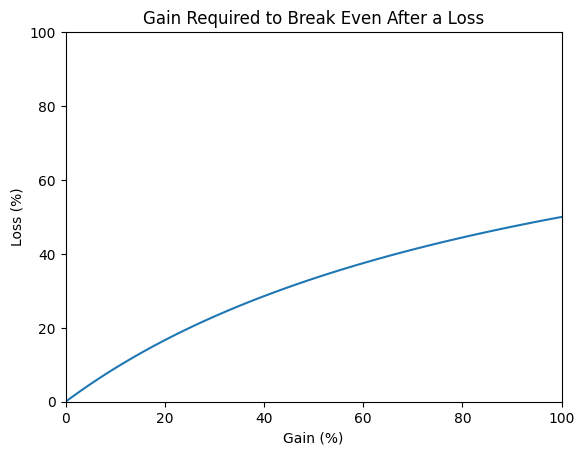

In [3]:
# Plot of % gain necessary to offset a % loss.
import numpy as np
import matplotlib.pyplot as plt

# Generate 0% to 50% loss values.
loss = np.linspace(0, 0.6, 100)
gain = []

# Calculate equivalent gain values for each loss value.
for i in range(len(loss)):
    Value = 100 * (1 - loss[i])
    gain.append(100 / Value - 1)

loss = loss * 100
gain = np.array(gain)
gain = gain * 100

# Plot.
plt.plot(gain, loss)
plt.xlabel('Gain (%)')
plt.ylabel('Loss (%)')
plt.xlim(0, 150)
plt.ylim(0, 100)
plt.title('Gain Required to Break Even After a Loss')
plt.show()


---

## Papers

### Foundational Papers

**Gordon Growth Model (1962)**
* Posits that the instrinsic value of a stock is based on a series of future dividends that grow at a constant rate:

$$P = \frac{D_1}{r - g}$$

* Where:
    * $P$ is the stock price.
    * $D_1$ is the value of the next dividend.
    * $r$ is the risk-free rate and $g$ is the constant growth rate of the dividend in perpetuity.

**Campbell-Shiller Decomposition (1988)**
* Extends the Gordon Growth Model by decomposing the total return of a stock into a dividend yield (DY) and capital gains yield (CGY) that captures the return investors expect to receive as a result of price appreciation.

$$DY = \frac{D_1}{P_0}$$

$$CGY = \frac{P_1 - P_0}{P_0}$$

---

### Capital Asset Prices: A Theory of Market Equilibrium Under Conditions of Risk (CAPM) - William Sharpe (1964)
* One factor model in which the factor is the expected excess return of the entire market.
* The expected excess return of the $j^{th}$ security $E[R_j] - R_f$ is estimated as:

$$E[R_j] - R_f = \beta_j(E[R_m] - R_f)$$

* Where:
    * $R_f$ is the risk-free rate (commonly one-month T-bill).
    * $R_m$ is the return of the market.
* Note, most empirical studies that use CAPM take the aggregate stock market as the measure of $R_m$. Roll's critique in Roll (1977) claims that it is impossible to form a truly diversified market portfolio $R_m$ as this portfolio would need to include every investment in every market, commodities, and anything with a marketable value.
    * This is significant as a small change in $R_m$ has a large effect on the model.

---

### On the Pricing of Corporate Debt: The Risk Structure of Interest Rates - Robert Merton (1974)

* Notes based on: A Review of Merton’s Model of the Firm’s Capital Structure with Its Wide Applications - Suresh Sundaresan (2013)
* Merton (1974) is a seminal structural model of default that is at the intersection of two big questions in finance: how to explain credit spreads and how to think about the design of a firm's capital structure (split between debt and equity).
* The Merton structural model makes the following key assumptions:
    1. There are no transaction costs or taxes.
    2. There are a sufficient number of investors to buy and sell as much of the asset as necessary (liquidity).
    3. There exists an exchange market for borrowing and lending at the same rate of interest. 
    4. Short sales of all assets are allowed.
    5. Trading of assets takes place continuously in time.
    6. The Modiliani-Miller theorem holds.
    7. The term structure is flat and known with certainty, i.e. the price of a bond that promises 1 dollar at $T$ in the future is $P(t,T) = e^{-r(T-t)}$ where $r$ (the risk-free rate) is the same for all maturities $T$.
    8. The dynamics for the value of the firm $V$ follow a diffusion-type stochastic process (Geometric Brownian Motion).

**Aside: Modigliani-Miller Theorem**
* States that the market value of a company is correctly calculated as the present value of its future earnings and underlying assets, regardless of the capital structure of the firm.
* i.e. the value of the firm does not depend on the debt-equity ratio.


* Assumptions 1-4 are the perfect market assumptions and can easily be relaxed in extensions of the model.
* Assumption 7 can be relaxed to incorporate stochastic interest rates that are dependent on state variables in the economy.
* Assumptions 5, 6, and 8 are the key assumptions of the structural model.
* Merton (1974) provides tractable and closed-form solutions to three possible manifestations of corporate debt: zero-coupon debt, coupon-bearing debt, and callable debt.
* The following summarizes the zero-coupon debt approach.
* The value of the firm $V$ is assumed to follow a Geometric Brownian Motion with drift $\mu$ and volatility $\sigma$. This is defined by the following stochastic differential equation (SDE):
$$dV_t = V_t([r - \delta]dt + \sigma dW_t)$$
* Recall that the general equation for Geometric Brownian Motion is:
$$dS_t = \mu S_t dt + \sigma S_t dW_t$$
* Where $S_t$ is the underlying process being modeled and $W_t$ is a Wiener process.
* In the Merton model $\delta$ is the constant cash flow payout ratio and $[r - \delta]$ is equivalent to $\mu$.
* The firm issues a zero-coupon bond with face value $B$ payable at maturity $T$.
* Default may only occur at $T$ and in this case creditors take over the firm at values $V_T$.
* Thus the payoff the creditors at $T$ is whichever is lower at $B$, $V_T$, or $B$.
$$D(V_T) = min(B, V_T) = B - (B - V_T)$$
* In this sense, creditors are short a put option written on the assets of the borrowing firm ($V$) with a strike price equal to $B$, the face value of the bond. They have the right to sell the assets of the firm for $V_T$ if $V_T < B$.
* The borrower (the equity holder in the Merton model) owns a call option on the assets of the borrowing firm with a strike price $B$, they have a right to buy (maintain) the assets of the firm if $V_T > B$. 
* Instead of the value of the debt simply being the face value $B$, the value of the debt is the face value $B$ minus the value of the put option written on the assets of the firm to adjust for the probability of default and the right to claim $V_T$ if default occurs. 
* Thus we could express debt and equity as follows:
$$Debt = D(V_t, t) = P(t, T) - Put_{B}(V_t, B, r, T-t, \sigma)$$
$$Equity = E(V_t, t) = Call_{B}(V_t, B, r, T-t, \sigma)$$
* Where $P$ is the price of the debt and $Put_{B}$ is the price of a put option with strike price $B$.
* Merton's insight is that the spread between credit risky debt and otherwise identical risk-free debt is exactly the value of the put option written on the assets of the firm.
* Merton's model also gives us insight into the exact factors that determine credit spreads: the value of the firm $V_t$, leverage $B$ (the strike price), the risk-free rate $r$, the time to maturity $T-t$, and the volatility of the asset price $\sigma$.
* Using these base equations for debt and equity we can define leverage, solve for distance to default, and solve for probability of default.
* Defining time-to-maturity as: $\rho = T - t$ and $N(.)$ as the standard Gaussian cumulative distribution function below:
$$N(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{1}{2}y^2} dy$$
* Then we can use Ito's calculus and the original GBM equation to re-formulate corporate debt value $D$ as:
$$D(t, T) = V_te^{-\delta(T-t)}N(-d_1) + BP(t, T)N(d_2)$$
* Where:
$$d_1 = \frac{ln(\frac{V_t}{B}) + (r - \delta + \frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}$$
* And:
$$d_2 = d_1 - \sigma\sqrt{T-t}$$
* Using these formulas we can explicitly define the credit spread as:
$$R(T-t) - r = -\frac{1}{T-t}ln[V_te^{-\delta(T-t)}N(-d_1) + BP(t, T)N(d_2)]$$
* In the Merton model $d_2$ can be interpreted as the distance to default and $N(-d_2)$ can be interpreted as the probability of default.
$$P(default) = P(V_T < B) = N(-d_2)$$
* Using this we can calculate the the physical (risk-neutral) probability of default using the following equation:
$$P(default) = N(N^{-1}(\pi_P) + \frac{\mu - r}{\sigma}\sqrt{T-t})$$
* Where $\pi_P$ is $N(-d_2)$.

In [1]:
# Merton model implementation.
import numpy as np
import scipy.stats as si

# Equation for calculating N(.), the Gaussian cumulative distribution function.
def NormalDist(x):
    return si.norm.cdf(x, 0.0, 1.0)

# V = Value of the firm at V_t (today).
# B = Face value of the debt (amount to be repaid).
# T = Time to maturity of the debt (1-year if T=1).
# r = Risk-free interest rate.
# s = Volatility of the firm value per annum.

def Merton(V, B, r, T, s):
    d1 = np.log(V/(B*np.exp(-r*T)))/(s*np.sqrt(T))+0.5*s*np.sqrt(T)
    d2 = d1 - s*np.sqrt(T)
    DebtValue = B*np.exp(-r*T)*NormalDist(d2) + V*(1-NormalDist(d1))
    EquityValue = V*NormalDist(d1) - B*np.exp(-r*T)*NormalDist(d2)

    print("d1: ", d1)
    print("d2: ", d2)
    print("Debt value: ", DebtValue)
    print("Equity value: ", EquityValue)

# Assuming a firm whose value today is 100, with debt maturity in 1-year at the
# face value of 99.46 and a volatility (sigma) of 20%.
V = 100
B = 99.46
T = 1
r = 0.10
s = 0.20

Merton(V, B, r, T, s)

# Using this information we can calculate the firms probability of default:
print("Probability of default: ", NormalDist(-0.427))

d1:  0.6270731635074943
d2:  0.4270731635074943
Debt value:  86.40765166526288
Equity value:  13.592348334737117
Probability of default:  0.33468966384682775


---

### The Cross-Section of Expected Stock Returns - Fama, French (1992)

* Proposes three-factor model for explaining the cross-section of stock returns.
* In addition to CAPM, the three-factor model adds $SMB$ (Small Minus Big) and $HML$ (High Minus Low) factors. 
* The model is specified as:

$$E[R_j] - R_f = \beta_1(E[R_m] - R_f) + \beta_2 \cdot SMB + \beta_3 \cdot HML$$

* The $SMB$ "size factor" is calculated by first sorting stocks by market cap, then creating one portfolio of small stocks and one portfolio of large stocks (for example, the smallest 20% form one portfolio and the largest 20% form another portfolio), then calculate the return of each portfolio and compute: $SMB$ = return of small-cap portfolio - return of large-cap portfolio. 
* The $HMB$ "value factor" is based on sorts by book-to-market ratio = book value of equity / market value of equity.

---